# 🎨 Рисуем цветные точки лица. Соответсвие ключевых точек частям лица.
* В этом ноутбуке мы отобразим ключевые точки на лице Брэда Питта, Роберта Де Ниро и Дуэйн Джонсона.
* Также разберемся в соответствии точек из  landmarks и частям лица.

In [1]:
import os
import cv2
import copy
import torch
import numpy as np
import matplotlib.pyplot as plt

PATH_DATA = "/kaggle/input/vkcv2022-contest-01-facial-landmarks/contest01_data/"
PATH_TRAIN = os.path.join(PATH_DATA, "train")
PATH_TRAIN_IMAGE = os.path.join(PATH_TRAIN, "images")
PATH_TRAIN_LANDMARK = os.path.join(PATH_TRAIN, "landmarks.csv")

In [2]:
def draw_landmarks(img, landmarks):
    """
    Рисует цветные ключевые точки на лице.
    landmarks: np.array.
    """
    image = np.copy(img) # чтобы исходное изображение не менялось
    for i, point in enumerate(landmarks):
        if 0 <= i and i < 273:    # ОВАЛ ЛИЦА
            color = (0, 0, 255)
        elif 273 <= i and i < 401: # БРОВИ
            color = (128, 0, 0)
        elif 401 <= i and i < 587: # НОС
            color = (255, 255, 0)
        elif 587 <= i and i < 841: # ГЛАЗА
            color = (0, 255, 255)
        elif 841 <= i and i < 969: # РОТ
            color = (255, 0, 0)
        elif 969 <= i < 971: # ЗРАЧКИ
            color = (0, 0, 0)
        x, y = point.astype(np.int32)
        cv2.circle(img=image, center=(x, y), radius=1, color=color, thickness=-1)
    return image

Задаем пути до изображений, на которых хотим нарисовть точки:

In [3]:
robert_de_niro_img_path = "/kaggle/input/vkcv2022-contest-01-facial-landmarks/contest01_data/train/images/3ce64cc92545b9c33424f2ef65bb86f0.jpg"
brad_pitt_img_path = "/kaggle/input/vkcv2022-contest-01-facial-landmarks/contest01_data/train/images/d5a277caf04a277113cbdf6590bb1f6f.jpg"
dwayne_johnson_img_path = "/kaggle/input/vkcv2022-contest-01-facial-landmarks/contest01_data/train/images/acf8a79eb7f4c7709c8b9b22ad7dcf91.jpg"

train_images_for_visualization_path = set([
    robert_de_niro_img_path,
    brad_pitt_img_path,
    dwayne_johnson_img_path,
])

Находим,`img` и `landmarks` экземпляров по заданным путям:

In [4]:
train_samples_for_visualization = []
img_paths = []
img_landmarks = []

with open(PATH_TRAIN_LANDMARK, "rt") as fp:
    for i, line in enumerate(fp):
        if i == 0:
            continue  # skip header
        
        elements = line.strip().split("\t")
        image_name = os.path.join(PATH_TRAIN_IMAGE, elements[0])
        
        if image_name in train_images_for_visualization_path:
            
            img_paths.append(image_name)
            
            landmarks = list(map(np.int32, elements[1:]))
            landmarks = np.array(landmarks, dtype=np.int32).reshape((len(landmarks) // 2, 2))
            
            img_landmarks.append(landmarks)

img_landmarks = torch.as_tensor(img_landmarks)

for i, img_name in enumerate(img_paths):
    sample = {}
    
    image = cv2.imread(img_name)      # читаем изображение
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # перевод в другое цветовое пространство
    
    sample["image"] = image
    sample["landmarks"] = img_landmarks[i]
    
    train_samples_for_visualization.append(sample)

Рисуем:

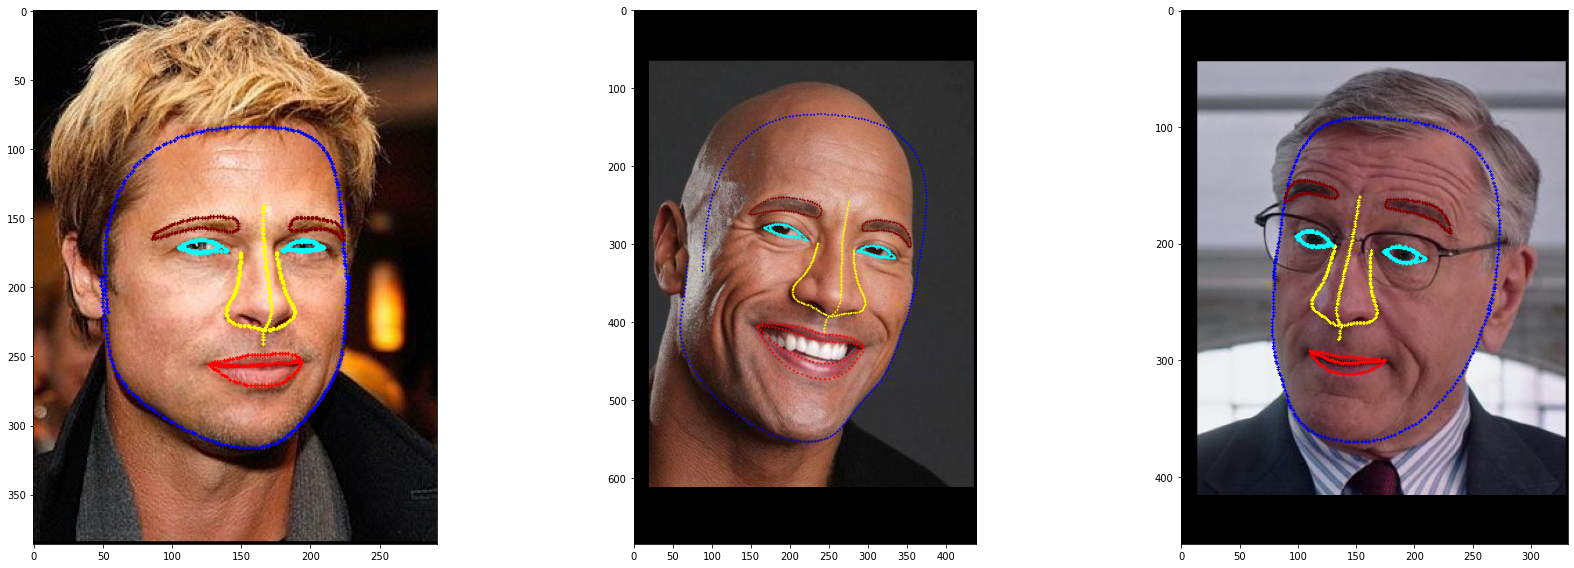

In [5]:
NUM_COLS = 3
NUM_ROWS = 1

plt.figure(figsize=(25, NUM_ROWS * 8))

for i in range(len(train_samples_for_visualization)):
    sample = copy.deepcopy(train_samples_for_visualization[i])
    img_tmp = draw_landmarks(sample["image"], np.array(sample["landmarks"]))
    plt.subplot(NUM_ROWS, NUM_COLS, i + 1)
    plt.imshow(img_tmp)

plt.tight_layout() # отступы между соседними рисунками
plt.show()